### Example 4.2

Penyelesaian Example 4.2 dari Buku **An Introduction to Computational Fluid Dynamics: The Finite Volume Method** Edisi ke-2 oleh Henk Kaarle Versteeg & Weeratunge Malalasekera, Halaman 121.

Diketahui:
Tebal plat $L = 2 cm = 0.02\ m$ dengan konduktivitas $k = 0.5\ W/m.K$ dan $q = 1000\ kW/m^{3}$. Pada titik A dan B memiliki suhu sebesar $100^{o}C$ dan $200^{o}C$. Pembagian grid menjadi 5 noda dengan $\delta x = 0.004\ m= 0.4\ cm$. Dan dengan $A = 1$.

Persamaan Pengatur:
$$\frac{d}{dx} \left( k\frac{dT}{dx} \right) + q = 0$$

In [1]:
import numpy as np
from decimal import Decimal as dec
from metnum_uma import add_dec, create_axis

# Diketahui:
L = 0.02 # (m) - Tebal plat
k = 0.5 # (W/m.K) - konduktivitas
q = 1000*1000 # (kW/m^3) - Uniform Heat Generation
TA = 100 # (C) - suhu di titik A
TB = 200 # (C) - suhu di titik B
dx = 0.002 # (m) - jarak grid control volume
A = 1 # (m^2) - Luasan

nodes = int(L/dx) # (..) - jumlah noda
print('Suhu di titik \tA = {:>5d} C\nSuhu di titik \tB = {:>5d} C\ndengan panjang \tL = {:>1.3f} m'.format(TA,TB,L))
print('Jumlah Noda \t  = {:>5d}\tdengan dx = {:1.3f} m'.format(nodes,dx))
axisx = create_axis(nodes, dx)

Suhu di titik 	A =   100 C
Suhu di titik 	B =   200 C
dengan panjang 	L = 0.020 m
Jumlah Noda 	  =    10	dengan dx = 0.002 m


In [2]:
# Buat Matrix Penyelesaian
mat_a = np.zeros([nodes, nodes])
mat_d = np.zeros([nodes])

# Buat Matrix A
for i in range(0, nodes):
    for j in range(0, nodes):
        if i == j and (i == 0): # Baris Pertama (Titik A)
            aW = 0
            aE = k*A/dx
            SP = -2*k*A/dx
            aP = aW + aE - SP
            mat_a[i, j] = aP
            mat_a[i, j+1] = -aE
        elif i == j and (i > 0 and i < nodes-1): # Baris Kedua sampai satu sebelum terakhir
            aW = k*A/dx
            aE = k*A/dx
            SP = 0
            aP = aW + aE - SP
            mat_a[i, j-1] = -aW
            mat_a[i, j] = aP
            mat_a[i, j+1] = -aE
        elif i == j and (i == nodes-1): # Baris Terakhir (Titik B)
            aW = k*A/dx
            aE = 0
            SP = -2*k*A/dx
            aP = aW + aE - SP
            mat_a[i, j-1] = -aW
            mat_a[i, j] = aP

# Matrix D
for i in range(0, nodes):
    if i == 0:
        Su = 2*k*A*TA/dx + q*A*dx
        mat_d[i] = Su
    elif i > 0 and i < nodes-1:
        Su = q*A*dx
        mat_d[i] = Su
    elif i == nodes-1:
        Su = q*A*dx + 2*k*A*TB/dx
        mat_d[i] = Su

result = np.linalg.solve(mat_a, mat_d) # Penyelesaian matrix
y_num = np.append(result, TB)
y_num = np.insert(y_num, 0, TA)

# Solusi Analitik
nodes_exact = 100 # Jumlah titik untuk solusi analitik
exact = []
axisx_exact = np.linspace(0, L, nodes_exact)
for x in axisx_exact:
    hasil = ((TB-TA)/L + (q/(2*k)*(L-x)))*x + TA
    exact.append(hasil)
    
print('Matrix A = \n{}\n====='.format(mat_a))
print('Matrix D = \n{}\n====='.format(mat_d))
print('Penyelesaian Matrix [AX = D], diperoleh matrix X = \n{}\n====='.format(result))


Matrix A = 
[[ 750. -250.    0.    0.    0.    0.    0.    0.    0.    0.]
 [-250.  500. -250.    0.    0.    0.    0.    0.    0.    0.]
 [   0. -250.  500. -250.    0.    0.    0.    0.    0.    0.]
 [   0.    0. -250.  500. -250.    0.    0.    0.    0.    0.]
 [   0.    0.    0. -250.  500. -250.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -250.  500. -250.    0.    0.    0.]
 [   0.    0.    0.    0.    0. -250.  500. -250.    0.    0.]
 [   0.    0.    0.    0.    0.    0. -250.  500. -250.    0.]
 [   0.    0.    0.    0.    0.    0.    0. -250.  500. -250.]
 [   0.    0.    0.    0.    0.    0.    0.    0. -250.  750.]]
=====
Matrix D = 
[ 52000.   2000.   2000.   2000.   2000.   2000.   2000.   2000.   2000.
 102000.]
=====
Penyelesaian Matrix [AX = D], diperoleh matrix X = 
[125. 167. 201. 227. 245. 255. 257. 251. 237. 215.]
=====


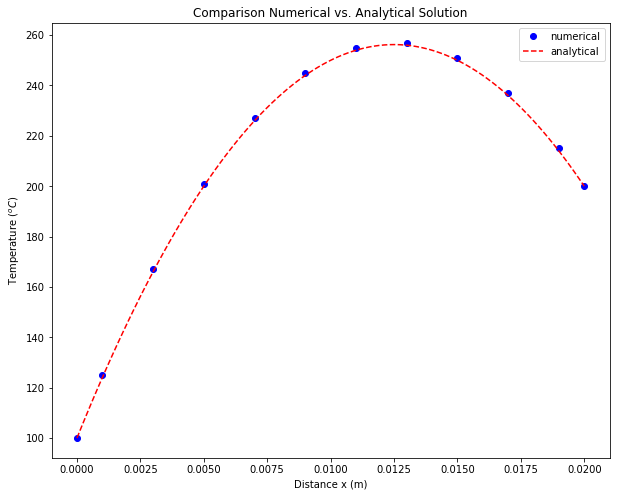

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,8)
plt.title('Comparison Numerical vs. Analytical Solution')
plt.xlabel('Distance x (m)')
plt.ylabel('Temperature $(^{o}C)$')
plt.plot(axisx, y_num, 'bo', label='numerical')
plt.plot(axisx_exact, exact, 'r--', label='analytical')
plt.legend()


#plt.annotate('Numerical', xy=(axisx[2],y_num[2]), xytext =(axisx[2]-0.002,y_num[2]+20),
#            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'),)

plt.show()

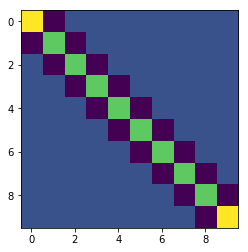

In [4]:
plt.imshow(mat_a);